In [176]:
# Make Predictions
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [177]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Read Direktori

In [178]:
# Direktori dataset
dataset_dir = 'D:/UTY/Semester 7/Pengembangan Aplikasi AI/Pengenal-Citra-Nomor-Kendaraan/Dataset/'

# Membuat path join untuk direktori pelatihan
train_dir = os.path.join(dataset_dir, 'pelatihan')

# Membuat path join untuk direktori pengujian
test_dir = os.path.join(dataset_dir, 'pengujian')

In [179]:
# Load model
model = tf.keras.models.load_model('./models/object_detection.h5')
print('model loaded succesfuly')

model loaded succesfuly


In [180]:
path = test_dir+'/K4_AB1892EF.JPG'
image = load_img(path) # PIL object
image = np.array(image, dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 # Convert into array and get the normalized output


In [181]:
# size of the original image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 3024
Width of the image = 4032


In [182]:
# Image Rotation
rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), -90, 1) # Mendapatkan matriks rotasi
image = cv2.warpAffine(image, rotation_matrix, (w, h)) # Melakukan rotasi pada gambar

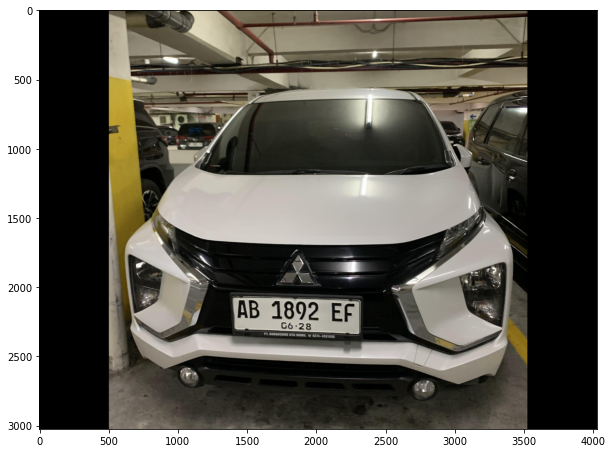

In [183]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [184]:
image_arr_224.shape

(224, 224, 3)

In [185]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [186]:
# make predictions
coords = model.predict(test_arr)
coords

array([[0.29204157, 0.6715339 , 0.6798953 , 0.7907468 ]], dtype=float32)

# Denormalize

In [187]:
# Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[1177.51161003, 2707.62461472, 2056.00333214, 2391.21834755]])

In [188]:
coords = coords.astype(np.int32) # Membulatkan
coords

array([[1177, 2707, 2056, 2391]])

# Bounding Box

(1177, 2056) (2707, 2391)


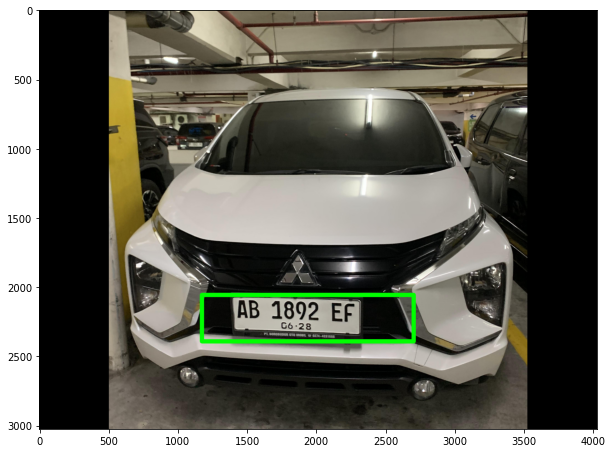

In [189]:
# draw bounding on top the image
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),30)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Create Pipeline Model

In [190]:
def object_detection(path):
    # Read Image
    image = load_img(path) # PIL object
    image = np.array(image, dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert into array and get the normalized output
    h,w,d = image.shape # size of the original image
    # Image Rotation
    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), -90, 1) # Mendapatkan matriks rotasi
    image = cv2.warpAffine(image, rotation_matrix, (w, h)) # Melakukan rotasi pada gambar
    # make predictions
    test_arr = image_arr_224.reshape(1,224,224,3)
    coords = model.predict(test_arr)
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32) # Membulatkan
    # draw bounding on top the image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),30)
    return image, coords

(1177, 2056) (2707, 2391)


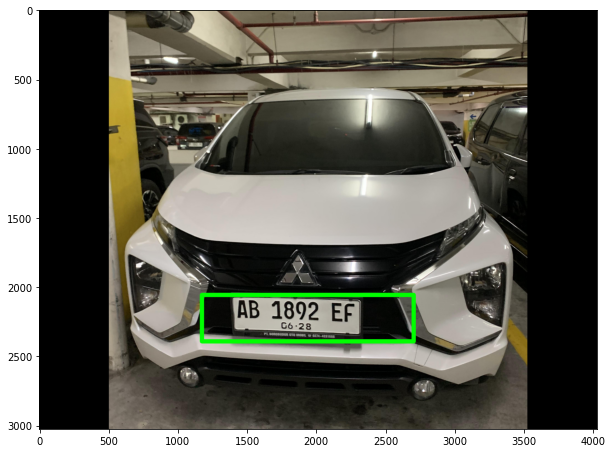

In [191]:
path = test_dir+'/K4_AB1892EF.JPG'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [192]:
import pytesseract as pt
pt.pytesseract.tesseract_cmd = r'C:\Users\Aqil Wahid\AppData\Local\Tesseract-OCR\tesseract.exe'
image_to_string = pt.pytesseract.tesseract_cmd

(1466, 1970) (3070, 2286)


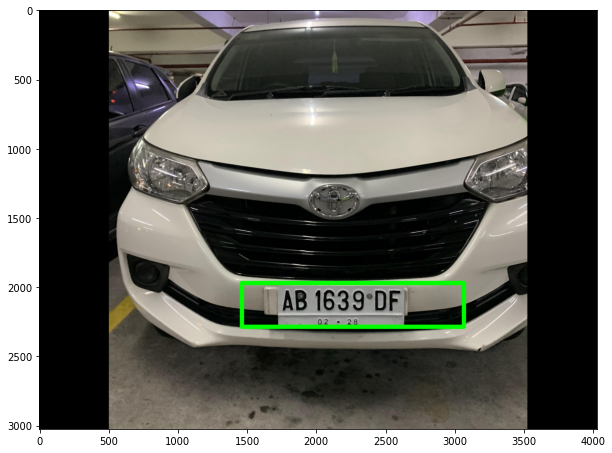

In [193]:
path = test_dir+'/K4_AB1639DF.JPG'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [194]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]

# Image Rotation
rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), -90, 1) # Mendapatkan matriks rotasi
img = cv2.warpAffine(img, rotation_matrix, (w, h)) # Melakukan rotasi pada gambar

roi = img[ymin:ymax,xmin:xmax] # Region of Interest


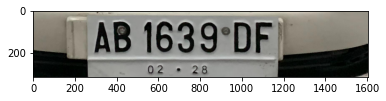

In [195]:
plt.imshow(roi)
plt.show()

In [198]:
# extract text from image
text = pt.image_to_string(roi)
print('Plat Nomor:',text)

Plat Nomor: AB16_39°DF


